In [1]:
# Vamos a realizar una prueba solo son la prediccion de latitudes
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.regularizers import l2
import sys

sys.path.append('../')
from Utils import utils_nn as utlnn
#Cargamos el Dataset
file_path = "../dataset/dataset-with-coord-cartesian.xlsx"

df = pd.read_excel(file_path)

In [2]:
x_columns = [
    'latitude_pos_tx', 'longitude_pos_tx', 'elevation_pos_tx', 'fc [Mhz]', 'elevation', 
    'azimuth', 'year', 'mmdd', 'hour']
x_df =df[x_columns]
out_x_coord = [f'x_{i}' for i in range(1,101)]
y_x_coord=df[out_x_coord]

In [3]:
x_train,x_test,y_train,y_test = train_test_split(x_df,y_x_coord,test_size=0.2,random_state=42)


In [4]:
l2_reg = 0.00
inputs = Input(shape=(9,))
encoded = Dense(9, activation='relu',kernel_regularizer=l2(l2_reg))(inputs)  # Compresión 8 V3 16 n 
decoded = Dense(16, activation='relu',kernel_regularizer=l2(l2_reg))(encoded) #V3
encoded = Dense(32, activation='relu',kernel_regularizer=l2(l2_reg))(encoded)
# encoded = Dense(32, activation='relu',kernel_regularizer=l2(l2_reg))(encoded)
encoded = Dense(64, activation = 'relu',kernel_regularizer=l2(l2_reg))(encoded)
# encoded = Dense(64, activation = 'relu',kernel_regularizer=l2(l2_reg))(encoded)
encoded = Dense(80, activation = 'relu',kernel_regularizer=l2(l2_reg))(encoded)
encoded = Dense(90, activation = 'relu',kernel_regularizer=l2(l2_reg))(encoded)

decoded = Dense(100, activation='linear',kernel_regularizer=l2(l2_reg), name = 'latitudes_output')(encoded)  # Reconstrucción a 100 puntos

autoencoder_x = Model(inputs, decoded)
autoencoder_x.compile(optimizer = 'adamW', loss='mse')
autoencoder_x.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 9)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 9)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 80)             │         5,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 90)             │         7,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latitudes_output (Dense)        │ (None, 100)            │         9,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,112 (94.19 KB)

 Trainable params: 24,112 (94.19 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = autoencoder_x.fit(x_train,y_train,
                          epochs=400,
                          batch_size=90, 
                          validation_split = 0.2) 

Epoch 1/400
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 3927.8877 - val_loss: 1678.2412
Epoch 2/400
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1621.4504 - val_loss: 1574.3348
Epoch 3/400
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1560.5963 - val_loss: 1561.4630
Epoch 4/400
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1516.5697 - val_loss: 1534.9248
Epoch 5/400
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1524.7819 - val_loss: 1518.9785
Epoch 6/400
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1517.5928 - val_loss: 1523.9813
Epoch 7/400
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1478.8632 - val_loss: 1491.3623
Epoch 8/400
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1453.0643 - val_loss: 1486.1805
Epoch 9/400
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1443.6000 - val_loss: 1453.4500
Epoch 10/400
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1440.7283 - val_loss: 1436.0433
Epoch 11/400
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1409.9622 - val_loss: 1360.22

In [6]:
loss = autoencoder_x.evaluate(x_test, y_test)
print(f'Pérdida en datos de Test: {loss}')

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 70.4524
Pérdida en datos de Test: 78.1231689453125


In [23]:
idx = 110  # Elegir una muestra para comparar

# Predicción de una muestra
y_pred = autoencoder_x.predict(np.expand_dims(x_test.iloc[idx], axis=0))
###############################################
y_true = y_test.iloc[idx] # Se obtine Algo de tipo Serie
y_true=y_true.to_numpy() # Transform a Numpy array
y_pred = y_pred.flatten() # [[...,...,...,....,]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


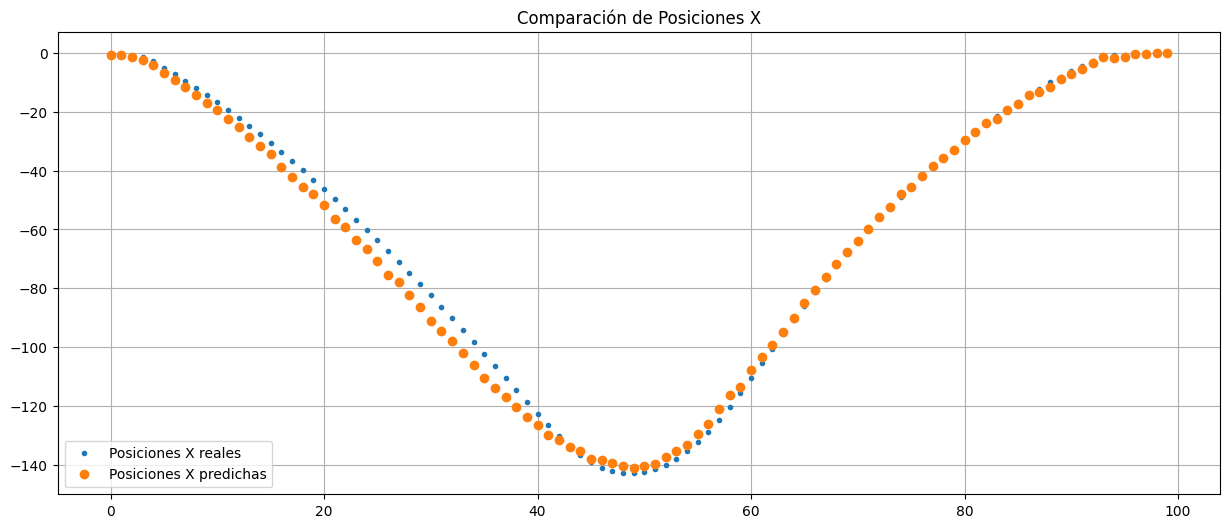

In [24]:
##Graficamos 
# Pos x
plt.figure(figsize=(15, 6))
plt.plot(y_true, label='Posiciones X reales', linestyle='None', marker='.')
plt.plot(y_pred, label='Posiciones X predichas', linestyle = 'None',marker='o')
# plt.ylim(-35,-50) ##(-60,-30)
plt.title('Comparación de Posiciones X')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
ecm, recm = utlnn.calculate_ECM_RECM(y_true,y_pred)
print(f'Error Cuadratico Medio:{ecm}, Raiz del Error Cuadratico Medio:{recm} [Km]')


Error Cuadratico Medio:14.060141595580248, Raiz del Error Cuadratico Medio:3.7496855328920913 [Km]


In [10]:
save_model = False

if save_model == True:
  autoencoder_x.save('../modelos_entrenamiento/modelos_x/mod_x_400_90.keras')